In [112]:
import fitz
import uuid
from PIL import Image
from pathlib import Path
import os

In [107]:
doc_path = 'จังหวัดสตูล/เขตเลือกตั้งที่ 02/นอกเขต,นอกราชฯ/ชุดที่ 3/สตูล-03-บัญชีรายชื่อ-นอกเขตนอกราช.pdf'
doc_name = Path(doc_path).name
doc = fitz.Document(doc_path)

In [117]:
for dirname, dirpaths, filenames in os.walk('จังหวัดสตูล/เขตเลือกตั้งที่ 01'):
    print(dirname, filenames)

จังหวัดสตูล/เขตเลือกตั้งที่ 01 []
จังหวัดสตูล/เขตเลือกตั้งที่ 01/ในเขต ['สตูล-01-บัญชีรายชื่อ-ในเขต.pdf', 'สตูล-01-แบ่งเขต-ในเขต.pdf']
จังหวัดสตูล/เขตเลือกตั้งที่ 01/อำเภอเมืองสตูล []
จังหวัดสตูล/เขตเลือกตั้งที่ 01/อำเภอเมืองสตูล/เทศบาลตำบลคลองขุด []
จังหวัดสตูล/เขตเลือกตั้งที่ 01/อำเภอเมืองสตูล/เทศบาลตำบลคลองขุด/หน่วยที่ 11 ['ต.คลองขุด-011-แบ่งเขต.pdf', 'ต.คลองขุด-011-บัญชีรายชื่อ.pdf']
จังหวัดสตูล/เขตเลือกตั้งที่ 01/อำเภอเมืองสตูล/เทศบาลตำบลคลองขุด/หน่วยที่ 16 ['ต.คลองขุด-016-บัญชีรายชื่อ.pdf', 'ต.คลองขุด-016-แบ่งเขต.pdf']
จังหวัดสตูล/เขตเลือกตั้งที่ 01/อำเภอเมืองสตูล/เทศบาลตำบลคลองขุด/หน่วยที่ 18 ['ต.คลองขุด-018-บัญชีรายชื่อ.pdf', 'ต.คลองขุด-018-แบ่งเขต.pdf']
จังหวัดสตูล/เขตเลือกตั้งที่ 01/อำเภอเมืองสตูล/เทศบาลตำบลคลองขุด/หน่วยที่ 19 ['ต.คลองขุด-019-บัญชีรายชื่อ.pdf', 'ต.คลองขุด-019-แบ่งเขต.pdf']
จังหวัดสตูล/เขตเลือกตั้งที่ 01/อำเภอเมืองสตูล/เทศบาลตำบลคลองขุด/หน่วยที่ 17 ['ต.คลองขุด-017-บัญชีรายชื่อ.pdf', 'ต.คลองขุด-017-แบ่งเขต.pdf']
จังหวัดสตูล/เขตเลือกตั้งที่ 01/อำเภอเมืองสตูล/เทศ

In [127]:
for dirname, dirpaths, filenames in os.walk('จังหวัดน่าน'):
    for filename in filenames:
        if not filename.endswith('.pdf'): continue

        doc_path = os.path.join(dirname, filename)

        doc_name = Path(doc_path).name
        print(doc_path)
        doc = fitz.Document(doc_path)

        for page in doc.pages():
            for image in page.get_images():
                xref = image[0]
                fitz.Pixmap(doc.extract_image(xref)['image']).save(f'images/{i:03d}.jpg')
                i += 1

จังหวัดน่าน/น่าน เขต 3/อำเภอบ่อเกลือ/แบ่งเขตเลือกตั้ง/บ่อเกลือใต้.pdf
จังหวัดน่าน/น่าน เขต 3/อำเภอบ่อเกลือ/แบ่งเขตเลือกตั้ง/ดงพญา.pdf
จังหวัดน่าน/น่าน เขต 3/อำเภอบ่อเกลือ/แบ่งเขตเลือกตั้ง/บ่อเกลือเหนือ.pdf
จังหวัดน่าน/น่าน เขต 3/อำเภอบ่อเกลือ/แบ่งเขตเลือกตั้ง/ภูฟ้า.pdf
จังหวัดน่าน/น่าน เขต 3/อำเภอบ่อเกลือ/บัญชีรายชื่อ/บ่อเกลือใต้.pdf
จังหวัดน่าน/น่าน เขต 3/อำเภอบ่อเกลือ/บัญชีรายชื่อ/บ่อเกลือเหนือ.pdf
จังหวัดน่าน/น่าน เขต 3/อำเภอทุ่งช้าง/แบ่งเขตเลือกตั้ง/งอบ.pdf
จังหวัดน่าน/น่าน เขต 3/อำเภอเชียงกลาง/แบ่งเขตเลือกตั้ง/เชียงคาน.pdf
จังหวัดน่าน/น่าน เขต 3/อำเภอเชียงกลาง/แบ่งเขตเลือกตั้ง/พระธาตุ.pdf
จังหวัดน่าน/น่าน เขต 3/อำเภอเชียงกลาง/แบ่งเขตเลือกตั้ง/เชียงกลาง.pdf
จังหวัดน่าน/น่าน เขต 3/อำเภอเชียงกลาง/แบ่งเขตเลือกตั้ง/ทต.เชียงกลาง.pdf


KeyboardInterrupt: 

In [124]:
i

1057

In [98]:
def get_image(doc, xref):
    """
    Gets an image from a PDF document.

    Args:
    doc: A PDF document object.
    xref: The xref of the image to get.

    Returns:
    An Image object representing the image.
    """

    pix = fitz.Pixmap(doc.extract_image(xref)['image'])
    return Image.frombytes('RGB', (pix.width, pix.height), pix.samples)

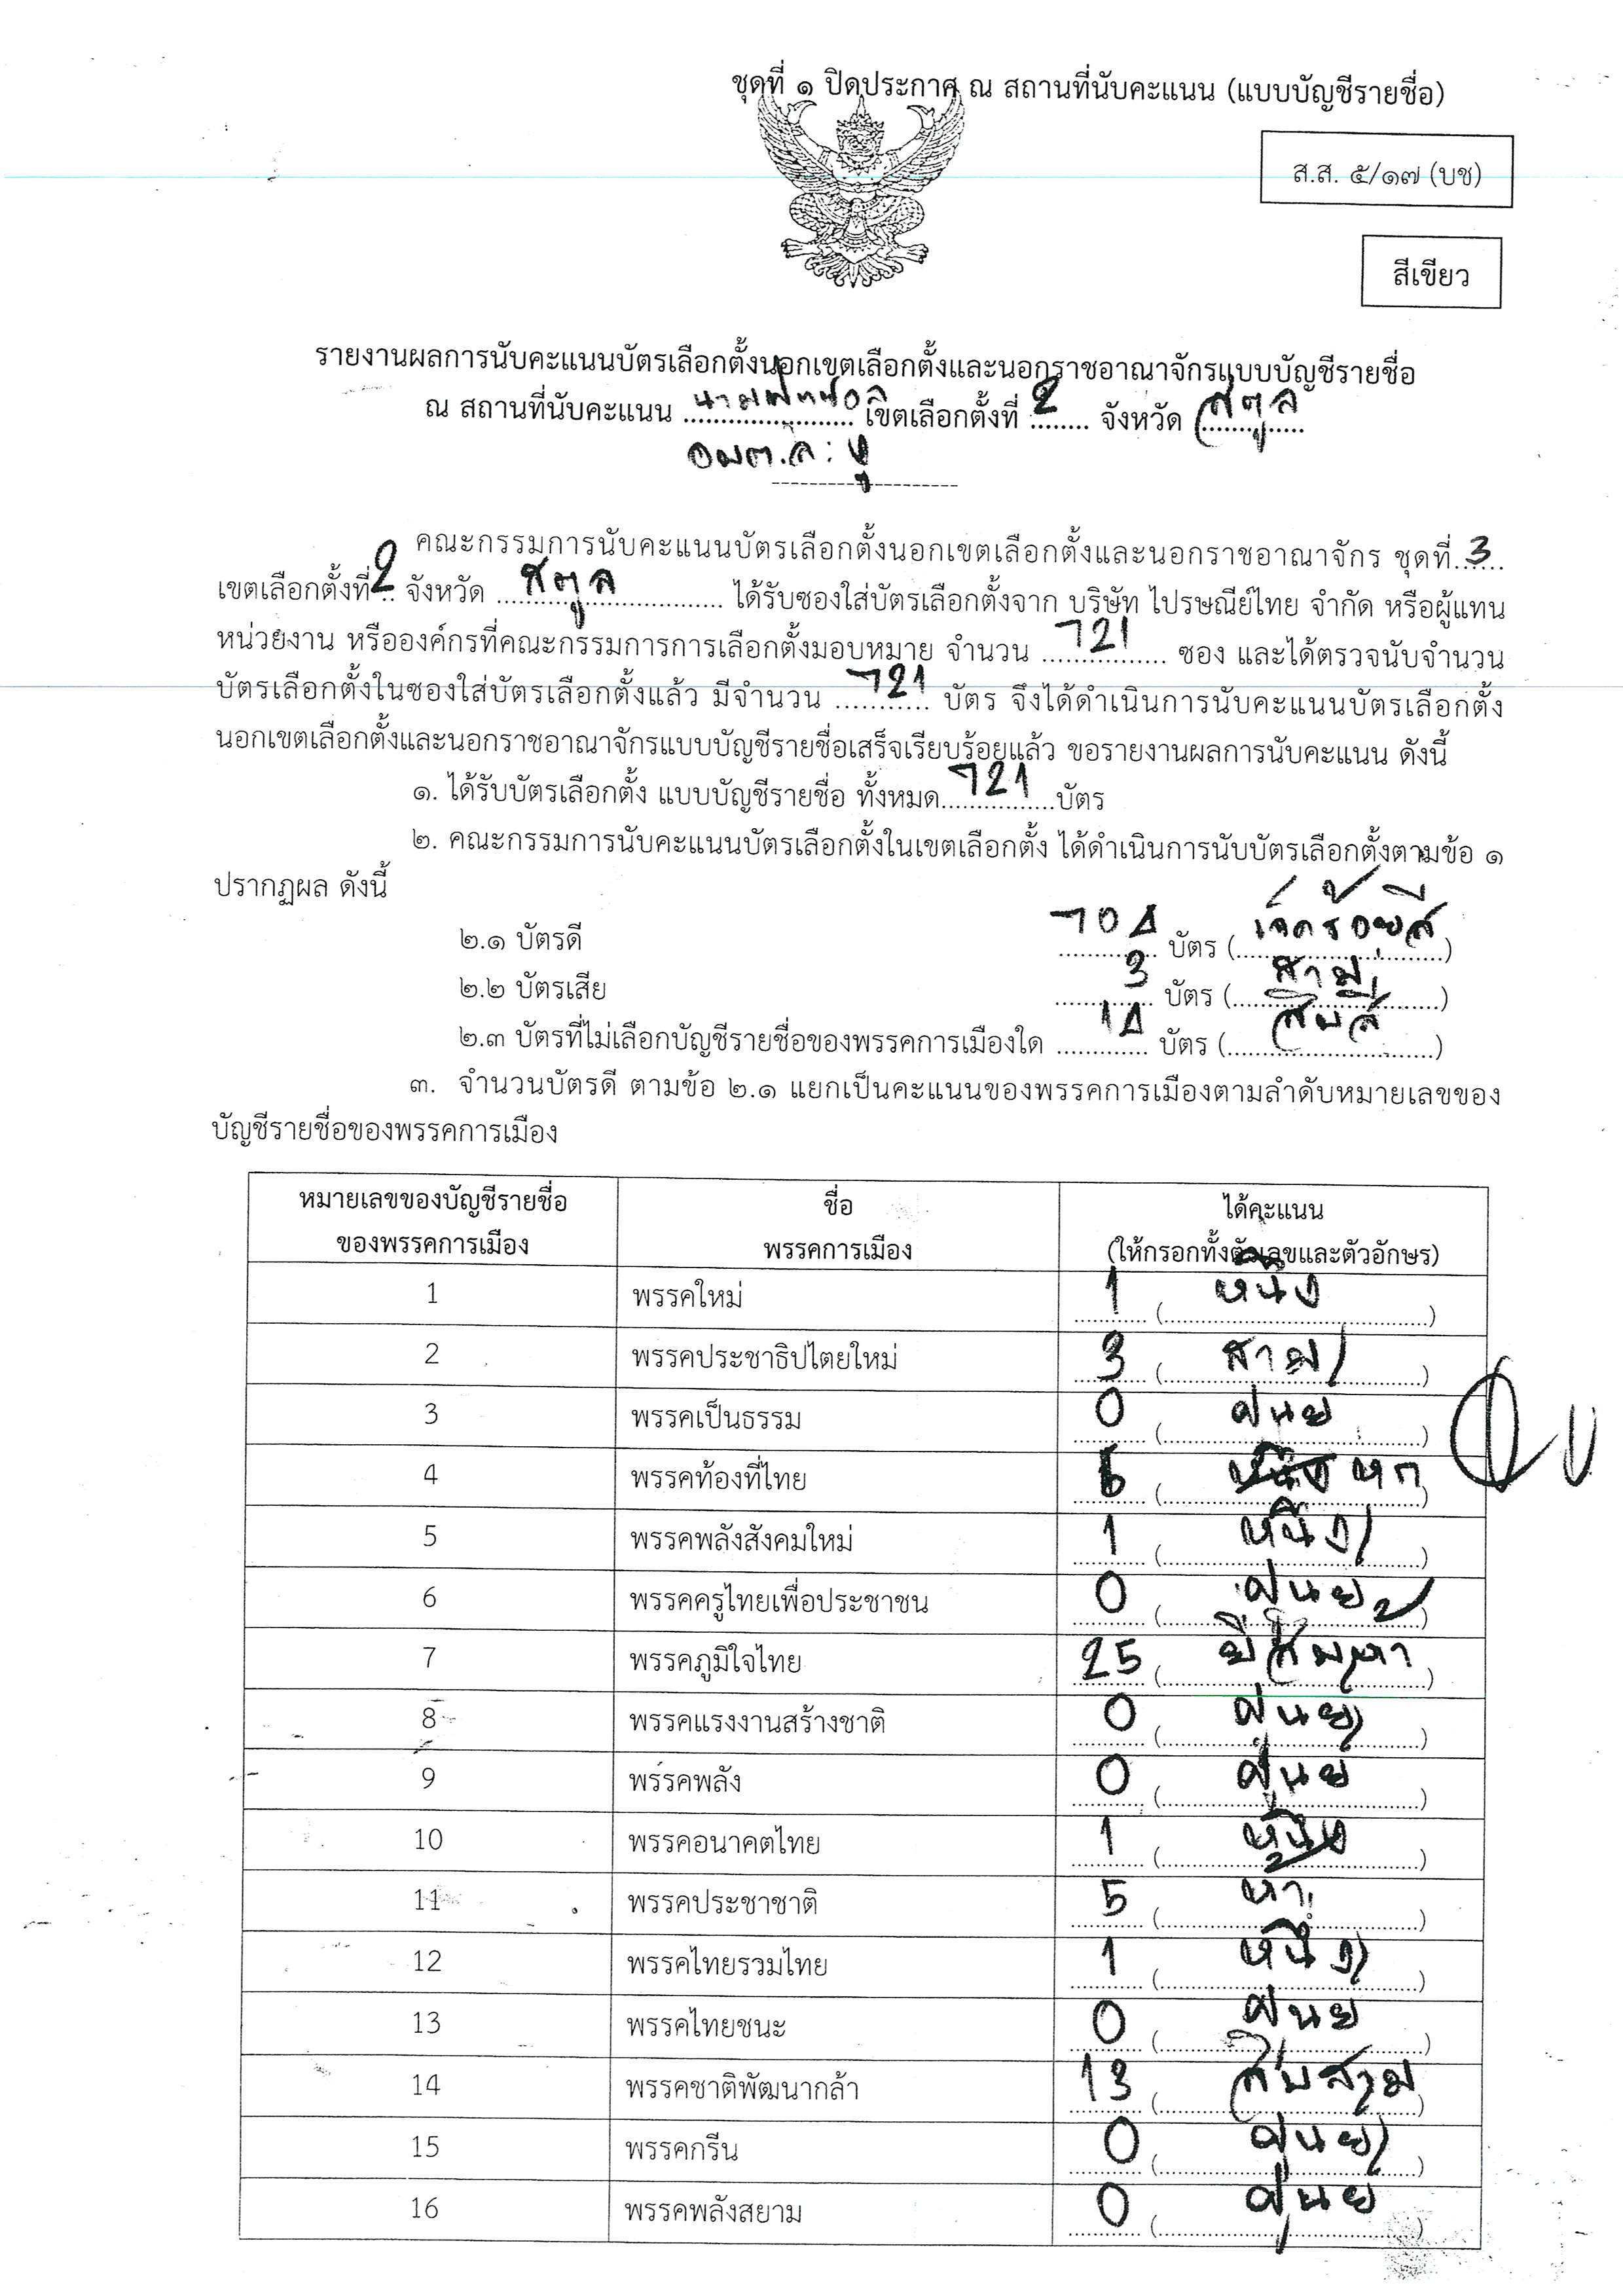

In [99]:
get_image(doc, 6)